# Arewa Data Science Academy
### Deep Learning Cohort2.0
### Name: Ahmad Wafiq Saad
### Title: Week 3 Solution

### Exercises Solution

1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.
Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [2]:
import torch.nn as nn

class BinaryClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=16):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [3]:
import torch.optim as optim

model = BinaryClassifier()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
Train the model for long enough for it to reach over 96% accuracy.
The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of a trained model.

    Args:
      model: The trained PyTorch model.
      X: The input data (features).
      y: The true labels.
    """

    # Create a meshgrid of points to evaluate the model on
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # Step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid
    with torch.no_grad():
        Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
        Z = Z.numpy()
        Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

In [11]:
from torchmetrics import Accuracy

num_epochs = 1000
accuracy = Accuracy(task="binary")

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train.float())
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        train_preds = model(X_train)
        test_preds = model(X_test)
        train_acc = accuracy(train_preds.squeeze(), y_train)
        test_acc = accuracy(test_preds.squeeze(), y_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")



Epoch [10/1000], Train Loss: 0.6509, Train Acc: 0.7800, Test Acc: 0.7550
Epoch [20/1000], Train Loss: 0.6505, Train Acc: 0.7800, Test Acc: 0.7550
Epoch [30/1000], Train Loss: 0.6501, Train Acc: 0.7800, Test Acc: 0.7550
Epoch [40/1000], Train Loss: 0.6497, Train Acc: 0.7800, Test Acc: 0.7550
Epoch [50/1000], Train Loss: 0.6493, Train Acc: 0.7800, Test Acc: 0.7550
Epoch [60/1000], Train Loss: 0.6489, Train Acc: 0.7812, Test Acc: 0.7550
Epoch [70/1000], Train Loss: 0.6485, Train Acc: 0.7812, Test Acc: 0.7550
Epoch [80/1000], Train Loss: 0.6481, Train Acc: 0.7812, Test Acc: 0.7550
Epoch [90/1000], Train Loss: 0.6478, Train Acc: 0.7825, Test Acc: 0.7550
Epoch [100/1000], Train Loss: 0.6474, Train Acc: 0.7825, Test Acc: 0.7550
Epoch [110/1000], Train Loss: 0.6470, Train Acc: 0.7825, Test Acc: 0.7550
Epoch [120/1000], Train Loss: 0.6466, Train Acc: 0.7825, Test Acc: 0.7550
Epoch [130/1000], Train Loss: 0.6462, Train Acc: 0.7825, Test Acc: 0.7600
Epoch [140/1000], Train Loss: 0.6458, Train Acc

Epoch [250/1000], Train Loss: 0.6416, Train Acc: 0.7862, Test Acc: 0.7600
Epoch [260/1000], Train Loss: 0.6413, Train Acc: 0.7875, Test Acc: 0.7600
Epoch [270/1000], Train Loss: 0.6409, Train Acc: 0.7887, Test Acc: 0.7600
Epoch [280/1000], Train Loss: 0.6405, Train Acc: 0.7887, Test Acc: 0.7600
Epoch [290/1000], Train Loss: 0.6402, Train Acc: 0.7887, Test Acc: 0.7600
Epoch [300/1000], Train Loss: 0.6398, Train Acc: 0.7900, Test Acc: 0.7600
Epoch [310/1000], Train Loss: 0.6394, Train Acc: 0.7900, Test Acc: 0.7600
Epoch [320/1000], Train Loss: 0.6391, Train Acc: 0.7912, Test Acc: 0.7600
Epoch [330/1000], Train Loss: 0.6387, Train Acc: 0.7912, Test Acc: 0.7600
Epoch [340/1000], Train Loss: 0.6384, Train Acc: 0.7912, Test Acc: 0.7600
Epoch [350/1000], Train Loss: 0.6380, Train Acc: 0.7912, Test Acc: 0.7600
Epoch [360/1000], Train Loss: 0.6377, Train Acc: 0.7925, Test Acc: 0.7600
Epoch [370/1000], Train Loss: 0.6373, Train Acc: 0.7925, Test Acc: 0.7600
Epoch [380/1000], Train Loss: 0.6369, 

5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

/tmp/ipykernel_5650/4205586329.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


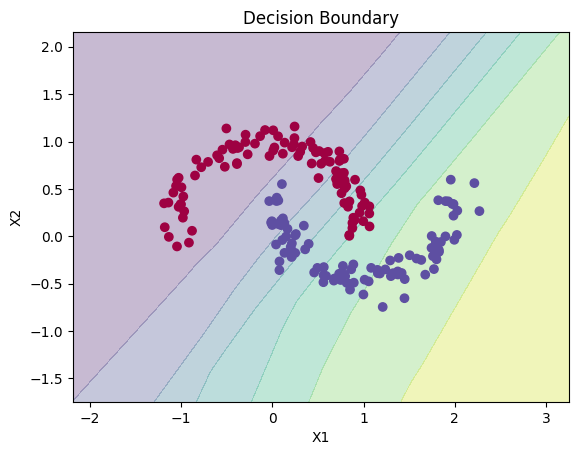

In [12]:
# Make predictions for plotting
with torch.no_grad():
    predictions = model(X_test)
    predictions = (predictions > 0.5).float()  # Convert probabilities to binary predictions

# Plot the decision boundary
plot_decision_boundary(model, X_test, y_test)

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
Feel free to reference the ML cheatsheet website for the formula.

In [13]:
class Tanh(nn.Module):
    def forward(self, x):
        return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
- Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
- Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
- Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
- Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.



Epoch [100/1000], Train Loss: 0.5619, Train Acc: 0.7119, Test Acc: 0.7025
Epoch [200/1000], Train Loss: 0.5581, Train Acc: 0.7094, Test Acc: 0.6975
Epoch [300/1000], Train Loss: 0.5545, Train Acc: 0.7113, Test Acc: 0.7050
Epoch [400/1000], Train Loss: 0.5505, Train Acc: 0.7125, Test Acc: 0.7050
Epoch [500/1000], Train Loss: 0.5461, Train Acc: 0.7106, Test Acc: 0.7025
Epoch [600/1000], Train Loss: 0.5413, Train Acc: 0.7188, Test Acc: 0.6975
Epoch [700/1000], Train Loss: 0.5359, Train Acc: 0.7306, Test Acc: 0.6875
Epoch [800/1000], Train Loss: 0.5303, Train Acc: 0.7350, Test Acc: 0.6875
Epoch [900/1000], Train Loss: 0.5248, Train Acc: 0.7369, Test Acc: 0.6825
Epoch [1000/1000], Train Loss: 0.5199, Train Acc: 0.7375, Test Acc: 0.6750


/tmp/ipykernel_5650/4198875017.py:90: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


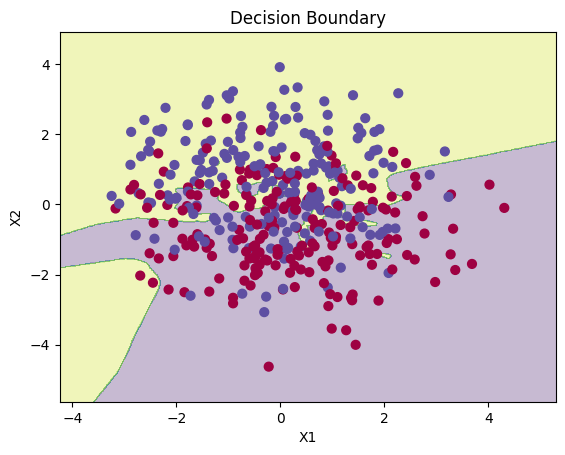

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics import Accuracy
import matplotlib.pyplot as plt

# Spiral dataset creation from CS231n
def spirals(n_points, noise=1.0):
    """
    Generates a two-dimensional spiral dataset for classification.
    """
    N = n_points
    theta = np.sqrt(np.random.rand(N)) * 2 * np.pi  # Generating radius
    r_a = 2 * theta + np.pi
    x1 = r_a * np.cos(theta) / 8 + np.random.randn(N) * noise
    y1 = r_a * np.sin(theta) / 8 + np.random.randn(N) * noise

    r_b = -2 * theta - np.pi
    x2 = r_b * np.cos(theta) / 8 + np.random.randn(N) * noise
    y2 = r_b * np.sin(theta) / 8 + np.random.randn(N) * noise

    X = np.vstack((np.append(x1, x2), np.append(y1, y2))).T
    y = np.hstack((np.zeros(N), np.ones(N)))
    return X, y

# Create the spiral dataset
X, y = spirals(1000)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Define the model
class MulticlassClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, output_size=2):
        super(MulticlassClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Instantiate the model
model = MulticlassClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize accuracy metric
accuracy = Accuracy(task="binary")

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        train_preds = model(X_train)
        test_preds = model(X_test)
        train_acc = accuracy(train_preds.argmax(dim=1), y_train)
        test_acc = accuracy(test_preds.argmax(dim=1), y_test)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # Step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    with torch.no_grad():
        Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
        Z = Z.argmax(dim=1).numpy()
        Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X_test, y_test)